In [1]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from IPython.display import display, Math, Latex

from salishsea_tools import (
    nc_tools,
    viz_tools,
)

In [2]:
%matplotlib inline

In [10]:
u_vel = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/14aug15/SalishSea_1h_20150814_20150814_grid_U.nc')
v_vel = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/14aug15/SalishSea_1h_20150814_20150814_grid_V.nc')
w_vel = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/14aug15/SalishSea_1h_20150814_20150814_grid_W.nc')


In [11]:
nc_tools.show_dimensions(u_vel)

<type 'netCDF4._netCDF4.Dimension'>: name = 'depthu', size = 40

<type 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 898

<type 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 398

<type 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 24

<type 'netCDF4._netCDF4.Dimension'>: name = 'tbnds', size = 2



In [12]:
nc_tools.show_variables(u_vel)

[u'depthu', u'nav_lat', u'nav_lon', u'time_counter', u'time_counter_bnds', u'u_wind_stress', u'vozocrtx']


In [13]:
nc_tools.show_variables(v_vel)

[u'depthv', u'nav_lat', u'nav_lon', u'time_counter', u'time_counter_bnds', u'v_wind_stress', u'vomecrty']


In [14]:
nc_tools.show_variables(w_vel)

[u'depthw', u'nav_lat', u'nav_lon', u'time_counter', u'time_counter_bnds', u'vovecrtz']


In [18]:
ugrid = u_vel.variables['vozocrtx']
vgrid = v_vel.variables['vomecrty']
zlevels = u_vel.variables['depthu']
timesteps = u_vel.variables['time_counter']

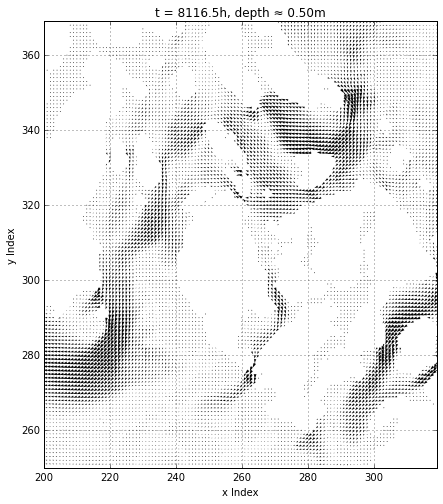

In [29]:
# Define the slice to plot
t, zlevel = 4, 0
y_slice = np.arange(250, 370)
x_slice = np.arange(200, 320)
# Slice and mask the arrays
ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
# "Unstagger" the velocity values by interpolating them to the T-grid points
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
# Plot the velocity vectors
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
ax.quiver(x_slice[1:], y_slice[1:], u_tzyx, v_tzyx)
# Axes limits and grid
ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()
# Axes label and title
ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))

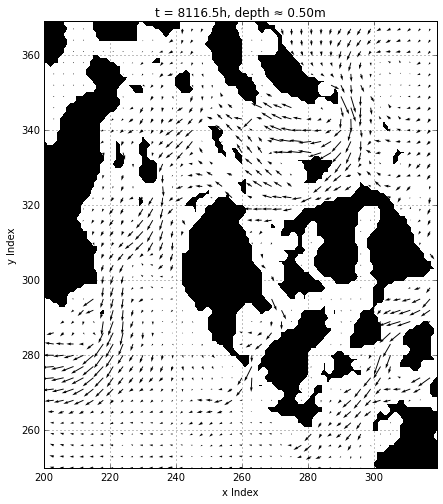

In [41]:
t, zlevel = 4, 0
y_slice = np.arange(250, 370)
x_slice = np.arange(200, 320)

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

arrow_step = 3
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
ax.quiver(x_slice_a[:], y_slice_a[:], u_tzyx[::3,::3], v_tzyx[::3,::3])
viz_tools.plot_land_mask(ax, '/data/dlatorne/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))

In [42]:
bathy = nc.Dataset('/data/dlatorne/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

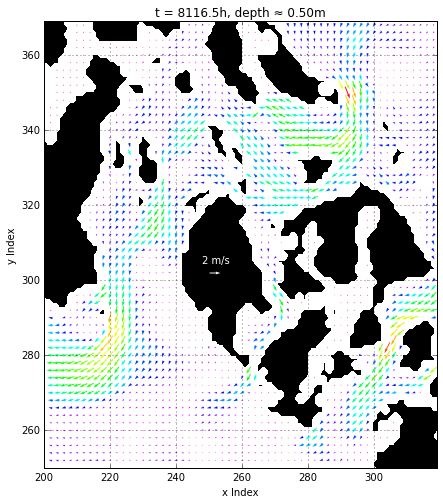

In [110]:
t, zlevel = 4, 0
y_slice = np.arange(250, 370)
x_slice = np.arange(200, 320)

arrow_step = 2
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice_a, x_slice_a], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice_a, x_slice_a], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
viz_tools.set_aspect(ax)
quiver = ax.quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx, v_tzyx, speeds, cmap='hsv_r', pivot='mid')
viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))
ax.quiverkey(quiver, 252, 302, 2, '2 m/s', coordinates='data', color='white', labelcolor='white')


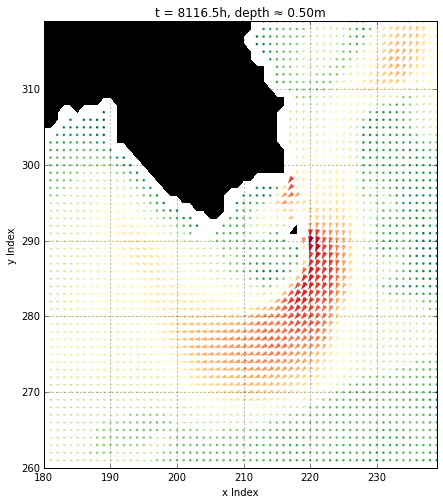

In [270]:
t, zlevel = 4, 0
y_slice = np.arange(260, 320)
x_slice = np.arange(180, 240)

arrow_step = 1
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice_a, x_slice_a], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice_a, x_slice_a], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
quiver = ax.quiver(
    x_slice_a[1:], y_slice_a[1:], u_tzyx, v_tzyx, speeds,
    pivot='mid', cmap='RdYlGn_r', width=0.007)
viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))
ax.quiverkey(quiver, 252, 302, 1, '1 m/s', coordinates='data', color='white', labelcolor='white')

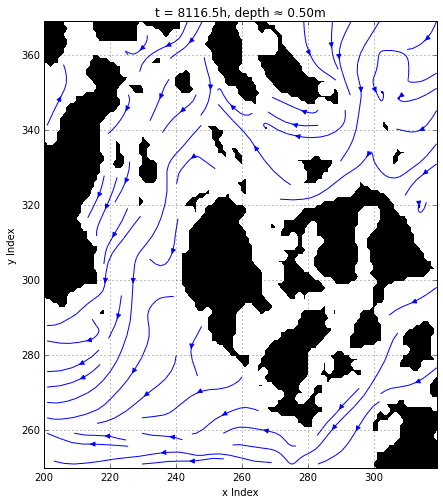

In [63]:
t, zlevel = 4, 0
y_slice = np.arange(250, 370)
x_slice = np.arange(200, 320)

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)

ax.streamplot(x_slice[1:], y_slice[1:], u_tzyx, v_tzyx)
viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))

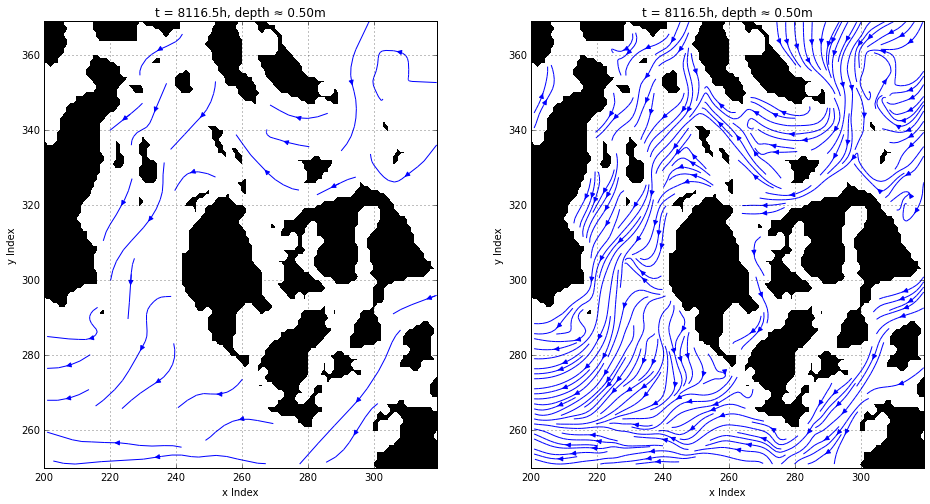

In [69]:
t, zlevel = 4, 0
y_slice = np.arange(250, 370)
x_slice = np.arange(200, 320)

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
densities = (0.5, 3)
for ax, density in zip(axs, densities):
    viz_tools.set_aspect(ax)

    ax.streamplot(
        x_slice[1:], y_slice[1:], u_tzyx, v_tzyx,
        density=density,
    )
    viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice)

    ax.set_xlim(x_slice[0], x_slice[-1])
    ax.set_ylim(y_slice[0], y_slice[-1])
    ax.grid()

    ax.set_xlabel('x Index')
    ax.set_ylabel('y Index')
    ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))


In [ ]:
t, zlevel = 4, 0

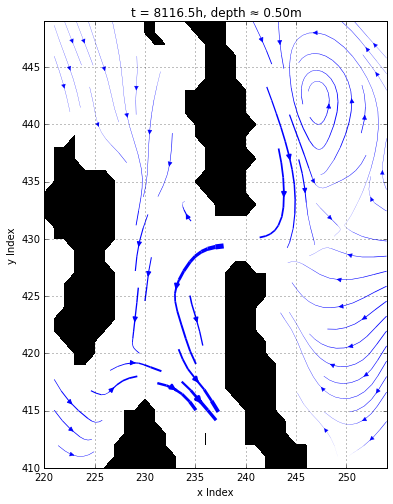

In [132]:
t, zlevel = 4, 0
y_slice = np.arange(410, 450)
x_slice = np.arange(220, 255)

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
max_speed = viz_tools.calc_abs_max(speeds)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)

ax.streamplot(
    x_slice[1:], y_slice[1:], u_tzyx, v_tzyx,
    linewidth=7*speeds/max_speed,
)
viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))

In [91]:
display(Math(r'u = xcos(\theta)-ysin(\theta)'))
display(Math(r'v = xsin(\theta)+ycos(\theta)'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#Unadjusted Streamplot

Streamplot of Victoria area without coordinate adjustment. 

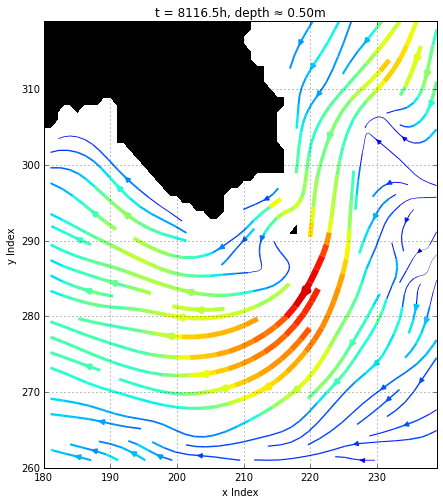

In [246]:
t, zlevel = 4, 0
y_slice = np.arange(260, 320)
x_slice = np.arange(180, 240)

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
max_speed = viz_tools.calc_abs_max(speeds)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)

streams = ax.streamplot(
    x_slice[1:], y_slice[1:], u_tzyx, v_tzyx, density=1,
    linewidth=7*speeds/max_speed, color=speeds, cmap='jet')
viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))


In [92]:
t = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/14aug15/SalishSea_1h_20150814_20150814_grid_T.nc')
lats = t.variables['nav_lat']
lons = t.variables['nav_lon']


# Porlier Pass

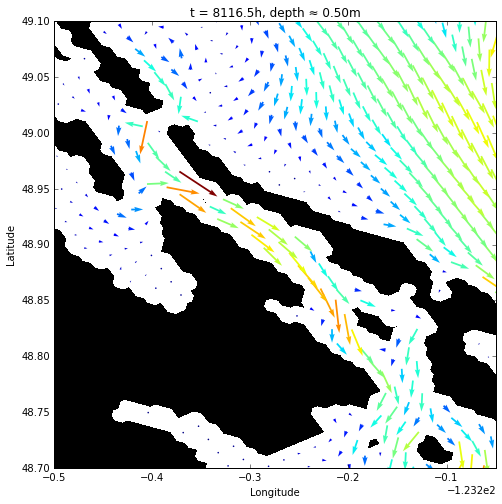

In [276]:
t, zlevel = 4, 0
step = 2
y_slice = np.arange(340, 450)
x_slice = np.arange(200, 300)

arrow_step = 1
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

lats_slice = lats[340:450, 200:300]
lons_slice = lons[340:450, 200:300]

theta=29
theta_rad=29 * np.pi / 180

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice_a, x_slice_a], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice_a, x_slice_a], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

u_E=u_tzyx * np.cos(theta_rad) - v_tzyx * np.sin(theta_rad)
v_N=u_tzyx * np.sin(theta_rad) + v_tzyx * np.cos(theta_rad)

speeds = np.sqrt(np.square(u_E) + np.square(v_N))
max_speed = viz_tools.calc_abs_max(speeds)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)


ax.quiver(lons_slice[1::3, 1::3], lats_slice[1::3, 1::3], u_E[::3,::3], v_N[::3,::3],
          speeds[::3,::3], pivot='mid', cmap='jet', clim=[0, 1.25], 
          width = 0.004, scale=1/0.08)
viz_tools.plot_land_mask(ax, bathy, coords='map', color='k')


ax.set_xlim([-123.7, -123.25])
ax.set_ylim([48.7, 49.1])
#ax.grid()

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))



#Boundary Pass

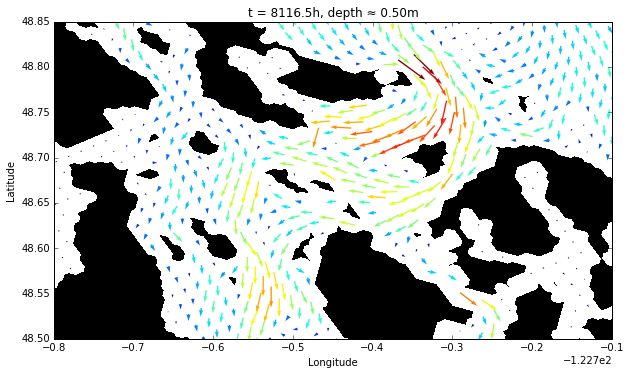

In [257]:
t, zlevel = 4, 0
step = 2
y_slice = np.arange(280, 400)
x_slice = np.arange(200, 350)

arrow_step = 1
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

lats_slice = lats[280:400, 200:350]
lons_slice = lons[280:400, 200:350]

theta=29
theta_rad=29 * np.pi / 180

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice_a, x_slice_a], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice_a, x_slice_a], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

u_E=u_tzyx * np.cos(theta_rad) - v_tzyx * np.sin(theta_rad)
v_N=u_tzyx * np.sin(theta_rad) + v_tzyx * np.cos(theta_rad)

speeds = np.sqrt(np.square(u_E) + np.square(v_N))
max_speed = viz_tools.calc_abs_max(speeds)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)


ax.quiver(lons_slice[1::3, 1::3], lats_slice[1::3, 1::3], u_E[::3,::3], v_N[::3,::3],
          speeds[::3,::3], pivot='mid', cmap='jet', clim=[0, 2], scale=1/0.025)
viz_tools.plot_land_mask(ax, bathy, coords='map', color='k')


ax.set_xlim([-123.5, -122.8])
ax.set_ylim([48.5, 48.85])
#ax.grid()

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))
ax.quiverkey(quiver, 252, 302, 1, '1 m/s', coordinates='data', color='white', labelcolor='white')


# Rosario Strait

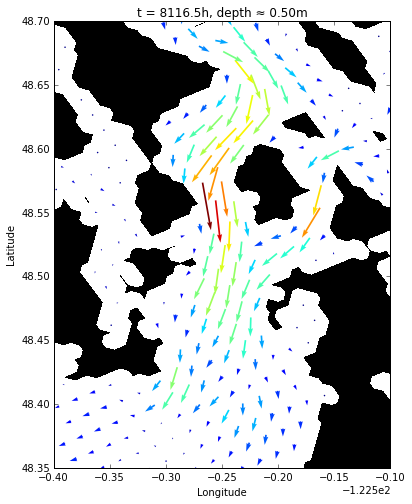

In [279]:
t, zlevel = 4, 0
step = 2
y_slice = np.arange(240, 330)
x_slice = np.arange(260, 350)

arrow_step = 1
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

lats_slice = lats[240:330, 260:350]
lons_slice = lons[240:330, 260:350]

theta=29
theta_rad=29 * np.pi / 180

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice_a, x_slice_a], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice_a, x_slice_a], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

u_E=u_tzyx * np.cos(theta_rad) - v_tzyx * np.sin(theta_rad)
v_N=u_tzyx * np.sin(theta_rad) + v_tzyx * np.cos(theta_rad)

speeds = np.sqrt(np.square(u_E) + np.square(v_N))
max_speed = viz_tools.calc_abs_max(speeds)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)


ax.quiver(lons_slice[1::3, 1::3], lats_slice[1::3, 1::3], u_E[::3,::3], v_N[::3,::3],
          speeds[::3,::3], pivot='mid', cmap='jet', clim=[0, 2.5], 
          width = 0.005, scale=1/0.055)
viz_tools.plot_land_mask(ax, bathy, coords='map', color='k')


ax.set_xlim([-122.9, -122.6])
ax.set_ylim([48.35, 48.7])
#ax.grid()

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))
ax.quiverkey(quiver, 252, 302, 1, '1 m/s', coordinates='data', color='white', labelcolor='white')

# Victoria

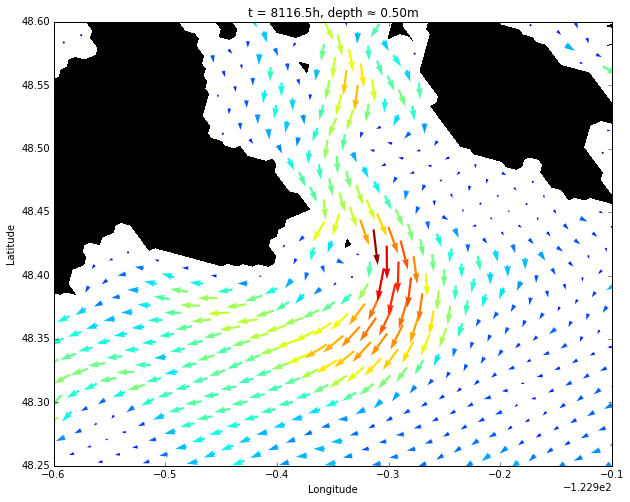

In [281]:
t, zlevel = 4, 0
step = 2
y_slice = np.arange(240, 350)
x_slice = np.arange(160, 270)

arrow_step = 1
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

lats_slice = lats[240:350, 160:270]
lons_slice = lons[240:350, 160:270]

theta=29
theta_rad=29 * np.pi / 180

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice_a, x_slice_a], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice_a, x_slice_a], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

u_E=u_tzyx * np.cos(theta_rad) - v_tzyx * np.sin(theta_rad)
v_N=u_tzyx * np.sin(theta_rad) + v_tzyx * np.cos(theta_rad)

speeds = np.sqrt(np.square(u_E) + np.square(v_N))
max_speed = viz_tools.calc_abs_max(speeds)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)


ax.quiver(lons_slice[1::3, 1::3], lats_slice[1::3, 1::3], u_E[::3,::3], v_N[::3,::3],
          speeds[::3,::3], pivot='mid', cmap='jet', clim=[0, 2.2], 
          width = 0.004, scale=1/0.03)
viz_tools.plot_land_mask(ax, bathy, coords='map', color='k')


ax.set_xlim([-123.5, -123])
ax.set_ylim([48.25, 48.6])
#ax.grid()

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))
ax.quiverkey(quiver, 252, 302, 1, '1 m/s', coordinates='data', color='white', labelcolor='white')

AssertionError: 

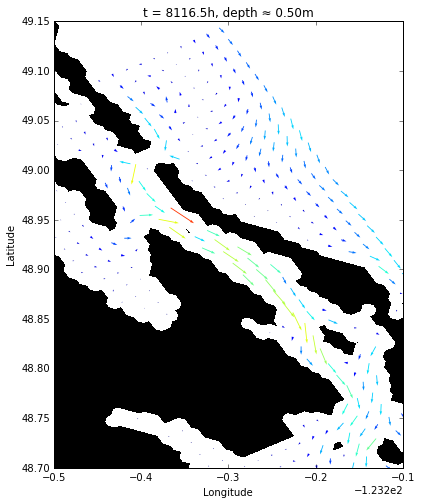

In [203]:
t, zlevel = 4, 0
step = 5
y_slice = np.arange(340, 450)
x_slice = np.arange(200, 270)

lats_slice = lats[340:450, 200:270]
lons_slice = lons[340:450, 200:270]

theta=29
theta_rad=29 * np.pi / 180

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

u_E=u_tzyx * np.cos(theta_rad) - v_tzyx * np.sin(theta_rad)
v_N=u_tzyx * np.sin(theta_rad) + v_tzyx * np.cos(theta_rad)

speeds = np.sqrt(np.square(u_E) + np.square(v_N))
max_speed = viz_tools.calc_abs_max(speeds)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)

arrow_step = 3
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

ax.quiver(lons_slice[1::3, 1::3], lats_slice[1::3, 1::3], u_E[::3,::3], v_N[::3,::3],
          speeds[::3,::3], pivot='mid', cmap='jet')
viz_tools.plot_land_mask(ax, bathy, coords='map', color='k')

ax.set_xlim([-123.7, -123.3])
ax.set_ylim([48.7, 49.15])
#ax.grid()

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))


streams = ax.streamplot(lons_slice[1::3, 1::3], lats_slice[1::3, 1::3], u_E[::3,::3], v_N[::3,::3],
    density=1,
    linewidth=7*speeds/max_speed, color=speeds, cmap='RdYlGn_r')
viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))

